# calculation of the efficiency for the detection of 511 keV $\gamma$ in a single scintillator , emitted isotropically

where a "detected" $\gamma$ is defined as one that knocked-out an electron (Compton or PE-effect) that subsequently deposited more than 260 keV in the scintillator

TOFPET2 ASIC threshold settings configured to:

vth_t1 = vth_t2 = vth_e = 5

In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/Geant4Sims/'

In [85]:
primaries = pd.read_csv(main_data_path + 'primaries_gamma511keV_alongXaxis_oneScintillator.csv')

x_scintillator = 50; # mm
primaries['dx_source_scintillator'] = np.abs(primaries['x_i/mm'] - x_scintillator)
primaries[0:5]

,eventId,trackId,PrtclName,Ek_i/MeV,theta_i/deg,phi_i/deg,x_i/mm,NScintillatorsFired,Unnamed: 8,dx_source_scintillator
0,0,1,gamma,0.511,22.3693,21.9760,-18.51560,0,NaN,68.51560
1,1,1,gamma,0.511,117.3170,-30.6079,19.51130,1,NaN,30.48870
2,2,1,gamma,0.511,87.1030,83.5461,6.26947,0,NaN,43.73053
3,3,1,gamma,0.511,38.2226,-59.1246,-42.60340,0,NaN,92.60340
4,4,1,gamma,0.511,88.5571,-50.5887,-17.52660,0,NaN,67.52660


## efficiency as a function of the source-scintillator distance

In [86]:
generated = primaries
detected = primaries[primaries.NScintillatorsFired>0]

In [87]:
dx_bins = np.linspace(10,100,18)
hgen,dx_edges = np.histogram(generated.dx_source_scintillator,dx_bins)
hgen_err = np.sqrt(hgen)
hrec,dx_edges = np.histogram(detected.dx_source_scintillator,dx_bins)
hrec_err = np.sqrt(hrec)
heff = np.double(hrec)/np.double(hgen)
heff_err = heff * np.sqrt( 1./np.double(hrec) + 1./np.double(hgen) )
dx = (dx_edges[1:] + dx_edges[:-1])/2

### cosmic background 
measured using only the single scintillator connected along 50 sec at
vth12e_5_cosmic_50sec

310 hits,
26 photons:
5 with 1 hits,
3 with 2 hits, 
4 with 5 hits, 
3 with 6 hits, 
2 with 35 hits, 
0 with more than 64 hits

Concluding that the cosmic rate for a threshold of 2 hits is $21/50 = 0.42\pm 0.1$ Hz in the scintillator

and this was measured 3 times to verify consistency

In [88]:
CosmicBkg = np.ones(len(heff)) * 0.42 * dT # 5 cosmic events/sec
CosmicBkg_err = np.ones(len(heff)) * 0.1 * dT # 5 cosmic events/sec

### expected rate of gamma events for a 370 kBq $^{22}$Na source
$$ \Gamma(expected) = \epsilon \times 370 Hz $$

We estimate the uncertainty in the sourec activity as 5%

In [89]:
dT = 10 # sec
Activity = 370 # events/sec
NevtsExp = heff * Activity * dT 
NevtsExp = NevtsExp + CosmicBkg
NevtsExp_err = np.sqrt( np.square(heff_err * Activity) + np.square(heff_err * 0.05*Activity) )* dT
NevtsExp_err = np.sqrt(np.square(NevtsExp_err) + np.square(CosmicBkg_err))

### measured rate of events
data stored in Na22_scingkeScintillator_measurements


20 mm 10 sec (3 times):

465 hits, 350 photons, 261 with 1 hit, 79 with 2 hits

606 hits, 400 photons, 290 with 1 hit, 95 with 2 hits

495 hits, 340 photons, 255 with 1 hit, 75 with 2 hits


40 mm 10 sec (3 times): 

482 hits, 288 photons, 226 with 1 hit, 53 with 2 hits

383 hits, 299 photons, 223 with 1 hit, 70 with 2 hits

328 hits, 244 photons, 180 with 1 hit, 53 with 2 hits

60 mm 10 sec (2 times): 

248 hits, 194 photons, 150 with 1 hit, 38 with 2 hits

253 hits, 188 photons, 141 with 1 hit, 40 with 2 hits


In [90]:
dxMeasured = np.array([20,40,60])
NevtsMeas = np.array([np.mean([79,95,75]),np.mean([53,70,53]),np.mean([38,40])])
NevtsMeas_err = np.array([np.std([79,95,75]),np.std([53,70,53]),3])

## plot results

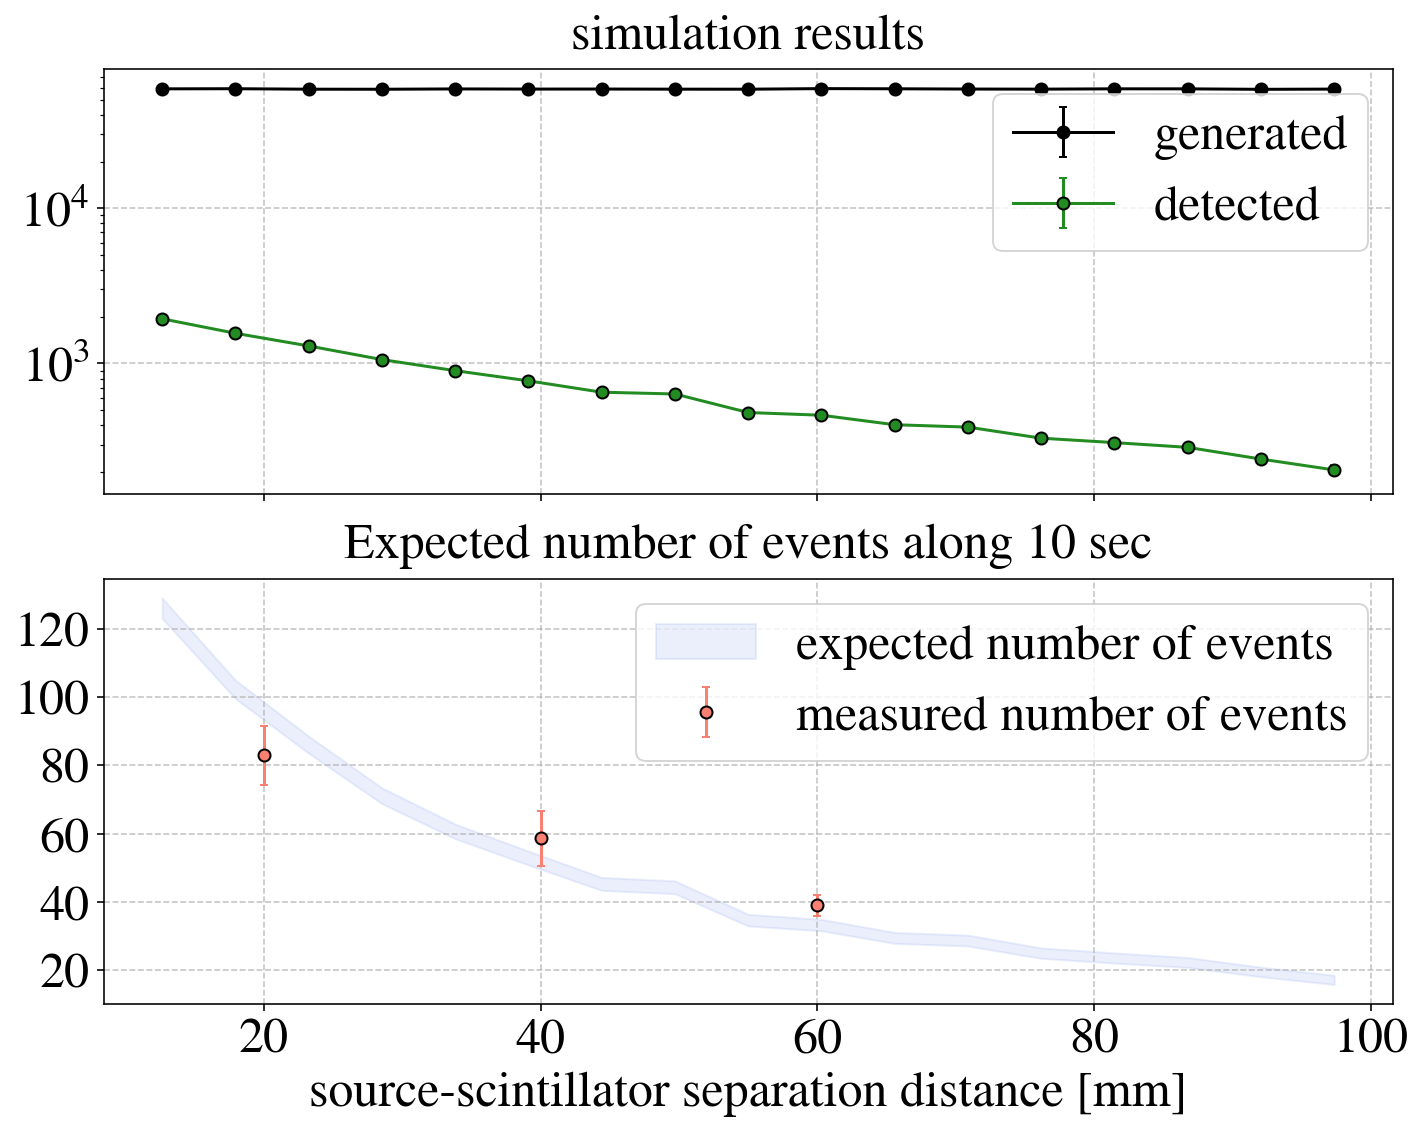

In [91]:
fig=plt.figure(figsize=(10,8))

ax=fig.add_subplot(2,1,1)
plt.errorbar(dx,hgen,hgen_err,label='generated',color='black',marker='o',markeredgecolor='k',capsize=2);
plt.errorbar(dx,hrec,hrec_err,label='detected',color='forestgreen',marker='o',markeredgecolor='k',capsize=2);
set_axes(ax,'',title='simulation results',remove_ticks_x=True,
         do_add_grid=True,do_add_legend=True);
ax.set_yscale('log')


ax=fig.add_subplot(2,1,2)
# plt.errorbar(dx,NevtsExp,NevtsExp_err,marker='o',markersize=5,markeredgecolor='k',linestyle='--',
#              label='expected number of events',capsize=2);
plt.fill_between(dx,NevtsExp-NevtsExp_err,NevtsExp+NevtsExp_err,color='royalblue',alpha=0.1,
             label='expected number of events');


plt.errorbar(dxMeasured,NevtsMeas,NevtsMeas_err,color='salmon',marker='o',markeredgecolor='k',linestyle='None',
             label='measured number of events',capsize=2);


# plt.errorbar(dx,hrec,hrec_err,label='detected',capsize=2);
set_axes(ax,'source-scintillator separation distance [mm]',title='Expected number of events along 10 sec',do_add_grid=True,do_add_legend=True);

plt.tight_layout()